# Proyecto de Predicción de Precios de Coches

# Proceso de Clasificación de los datos

# Imports

In [1]:
# Instalo las librerías necesarias

# Análisis de datos
import numpy as np
import pandas as pd

# Visualización
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
%matplotlib inline 

# Machine Learning
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import HuberRegressor
from sklearn.ensemble import RandomForestRegressor

## Cargo los datos

In [2]:
# Creo un DataFrame con Pandas del archivo csv
df = pd.read_csv("./CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Analizo los datos

In [3]:
# Para empezar puedo observar que el dataframe contiene 26 columnas/atributos (car_id, symboling, etc)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
# Aquí veo que tengo 205 registros, no hay nulos y tengo varios tipos de datos.
df.describe(include='all').style.background_gradient(cmap='Blues').set_properties(**{'font-family':'Segoe UI'}) # Include="all" para coger n tipos de datos diferentes

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,205.000000,205.000000,205.000000,205.000000,205,205,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,nan,nan,147,2,2,2,5,3,2,nan,nan,nan,nan,nan,7,7,nan,8,nan,nan,nan,nan,nan,nan,nan,nan
top,nan,nan,toyota corolla,gas,std,four,sedan,fwd,front,nan,nan,nan,nan,nan,ohc,four,nan,mpfi,nan,nan,nan,nan,nan,nan,nan,nan
freq,nan,nan,6,185,168,115,96,120,202,nan,nan,nan,nan,nan,148,159,nan,94,nan,nan,nan,nan,nan,nan,nan,nan
mean,103.000000,0.834146,nan,nan,nan,nan,nan,nan,nan,98.756585,174.049268,65.907805,53.724878,2555.565854,nan,nan,126.907317,nan,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,nan,nan,nan,nan,nan,nan,nan,6.021776,12.337289,2.145204,2.443522,520.680204,nan,nan,41.642693,nan,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,nan,nan,nan,nan,nan,nan,nan,86.600000,141.100000,60.300000,47.800000,1488.000000,nan,nan,61.000000,nan,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,nan,nan,nan,nan,nan,nan,nan,94.500000,166.300000,64.100000,52.000000,2145.000000,nan,nan,97.000000,nan,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,nan,nan,nan,nan,nan,nan,nan,97.000000,173.200000,65.500000,54.100000,2414.000000,nan,nan,120.000000,nan,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,nan,nan,nan,nan,nan,nan,nan,102.400000,183.100000,66.900000,55.500000,2935.000000,nan,nan,141.000000,nan,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


En un vistazo rápido puedo observar que hay 2 opciones para el tipo de combustible o el número de puertas y 7 de motor y cc.
El nombre de coche más usado, Toyota Corona. Predominan los coches de gasolina, 4 puertas, con el motor delante y 4 cilindros.
El precio medio es 13276.71, que el peso máximo en vacío es 4.066 y que el precio más bajo de un coche es 5.118.

# Visualizo los datos

array([[<AxesSubplot:title={'center':'car_ID'}>,
        <AxesSubplot:title={'center':'symboling'}>,
        <AxesSubplot:title={'center':'wheelbase'}>,
        <AxesSubplot:title={'center':'carlength'}>],
       [<AxesSubplot:title={'center':'carwidth'}>,
        <AxesSubplot:title={'center':'carheight'}>,
        <AxesSubplot:title={'center':'curbweight'}>,
        <AxesSubplot:title={'center':'enginesize'}>],
       [<AxesSubplot:title={'center':'boreratio'}>,
        <AxesSubplot:title={'center':'stroke'}>,
        <AxesSubplot:title={'center':'compressionratio'}>,
        <AxesSubplot:title={'center':'horsepower'}>],
       [<AxesSubplot:title={'center':'peakrpm'}>,
        <AxesSubplot:title={'center':'citympg'}>,
        <AxesSubplot:title={'center':'highwaympg'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

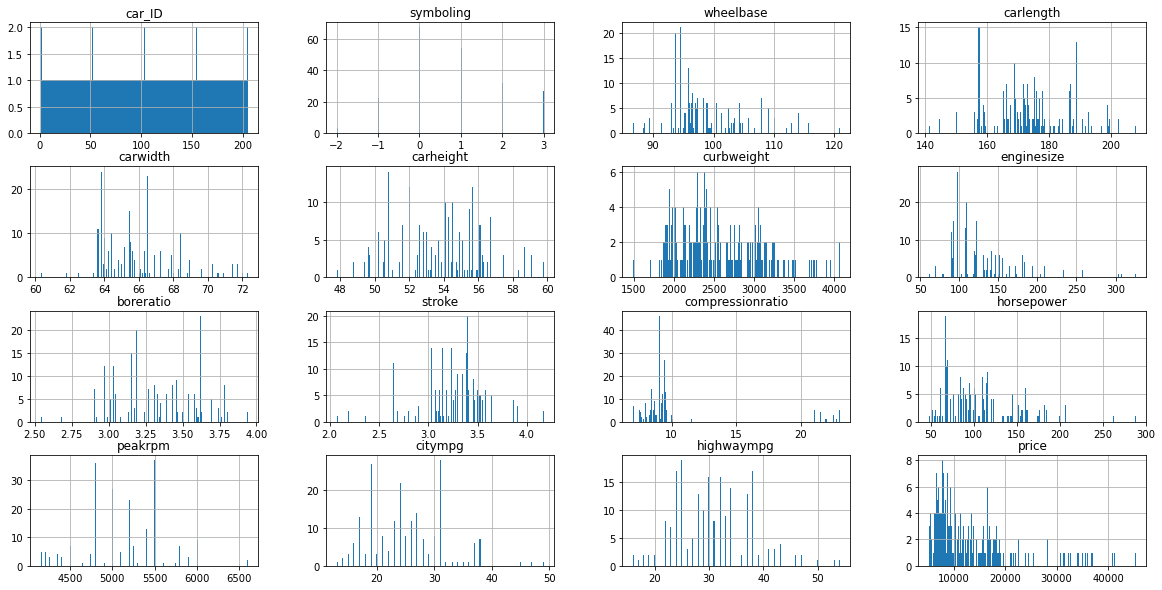

In [5]:
# Muestro un histograma de los campos del dataframe
df.hist(bins=200,figsize=[20,10])

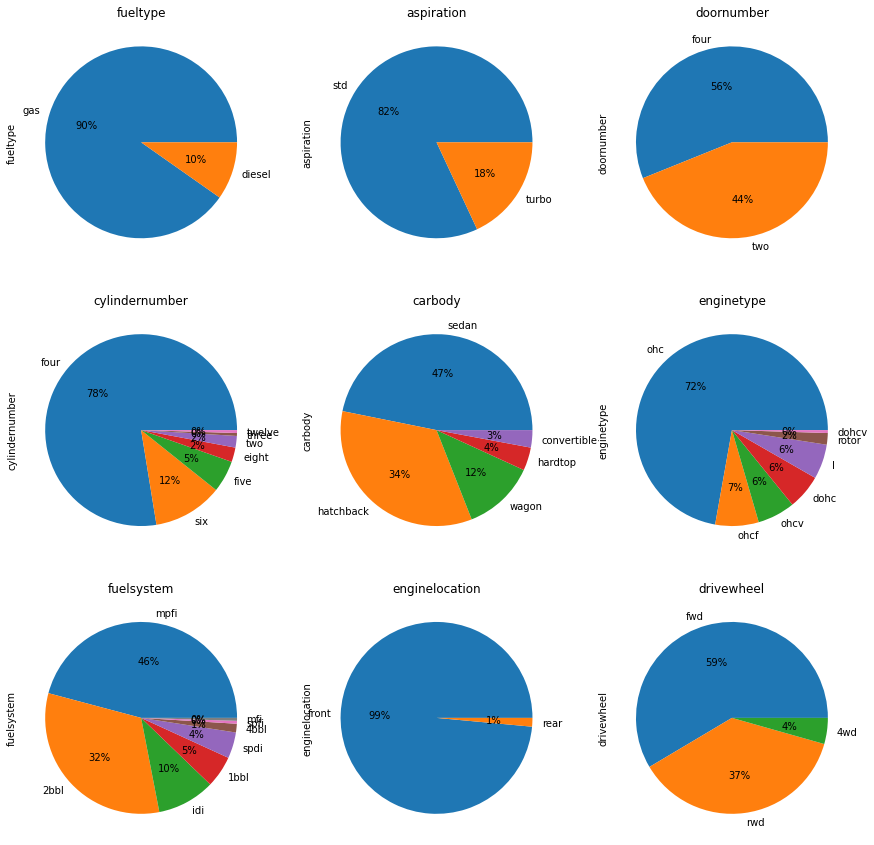

In [6]:
# Creo una función para hacer gráficos de pastel con porcentaje de los valores de las columnas
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()
# Muestro el gráfico de pastel creado anteriormente
pie_plot(df, ['fueltype', 'aspiration', 'doornumber', 'cylindernumber', 'carbody', 'enginetype', 'fuelsystem', 'enginelocation', 'drivewheel'], 3, 3)

## En este gráfico puedo ver más claramente algunos aspectos del dataframe, como por ejemplo que el tipo de combustible del 90% de los coches es gas, sólo el 18% tiene aspiración por turbo, el 56% de los coches tiene 4 puertas, el 78% tiene 4 cilindros, el 47% de las carrocerías son Sedán, el tipo de motor del 72% es OHC (OverHead Camshaft), el sistema de combustible del 46% es MPFI (Multi-point fuel injection) o que tan sólo el 1% tiene el motor trasero.

# Ahora intento ver que atributos tienen relación directa con el precio.

In [7]:
df[['enginelocation', 'price']].groupby(['enginelocation'], as_index=False).mean().sort_values(by='price', ascending=False)

,enginelocation,price
1,rear,34528.000000
0,front,12961.097361


## Aquí veo una clara diferencia de precio respecto a la posición del motor.

In [8]:
df[['CarName', 'price']].groupby(['CarName'], as_index=False).mean().sort_values(by='price', ascending=False)

,CarName,price
21,buick regal sport coupe (turbo),45400.0
14,bmw x5,41315.0
18,buick century special,40960.0
96,porsche boxter,37028.0
50,jaguar xk,36000.0
...,...,...
0,Nissan versa,5499.0
65,mitsubishi mirage,5389.0
123,toyota corona mark ii,5348.0
52,maxda rx3,5195.0


## Veo que el nombre también influye mucho siendo Sport Coupe y BMW X5 (45.400, 41.315)los coches más caros frente a Maxda RX3 y Chevrolet Impala siendo éstos los más baratos (5.195, 5151). Veré algunas más.

In [9]:
df[['cylindernumber', 'price']].groupby(['cylindernumber'], as_index=False).mean().sort_values(by='price', ascending=False)

,cylindernumber,price
0,eight,37400.100000
5,twelve,36000.000000
3,six,23671.833333
1,five,21630.469727
6,two,13020.000000
2,four,10285.754717
4,three,5151.000000


## 8 Cilindros en primera posición, seguido de 12 cc, 6 cc, 5 cc, 2 cc, 4 cc y 3 cc.

In [10]:
df[['horsepower', 'price']].groupby(['horsepower'], as_index=False).mean().sort_values(by='price', ascending=False)

,horsepower,price
54,184,43180.000000
53,182,36318.333333
57,262,36000.000000
46,155,34620.000000
56,207,34528.000000
52,176,33900.000000
58,288,31400.500000
37,123,28394.000000
40,140,23875.000000
28,106,22470.000000


### 184 Caballos de potencia en 1ª posición con 43.180 de precio medio frente a 48 caballos en última posición con 5151. Aquí puedo ver sin ser una regla que a mayor caballos, mayor precio.

In [11]:
df[['fueltype', 'price']].groupby(['fueltype'], as_index=False).mean().sort_values(by='price', ascending=False)

,fueltype,price
0,diesel,15838.1500
1,gas,12999.7982


## Aquí apenas hay diferencia, siendo el diesel un poco más caro que gasolina.

# Codificación de datos categóricos a ordinales

In [12]:
# Paso el número de cilindros a ordinal mediante el método .map()
df['cylindernumber'] = df['cylindernumber'].map({'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'eight':8, 'twelve':12})
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [13]:
# Número de puertas de categórico a ordinal
df['doornumber'] = df['doornumber'].map({'two':2, 'four':4})
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [14]:
# Paso datos categóricos a variables ficticas con .get_dummies()
df = pd.get_dummies(df, columns = ['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem'])

In [15]:
# Creo una variable con una lista de los nombres de los coches
car_names = df["CarName"].tolist()

In [16]:
unique_names = []
for car in car_names:
    unique_names.append(car.split()[0])
unique_names = set(unique_names)

In [17]:
for i, c in enumerate(df["CarName"]):
    for u in unique_names:
        if u in c:
            df['CarName'].iloc[i] = u

In [18]:
df = pd.get_dummies(df, columns = ['CarName'])
df.head()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarName_Nissan,CarName_alfa-romero,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_maxda,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porcshce,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_toyouta,CarName_vokswagen,CarName_volkswagen,CarName_volvo,CarName_vw
0,1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Muestro un examen de la forma general de los datos graficados para características importantes y otro examen de los datos en busca de observaciones inusuales que están muy alejadas de la masa de datos

In [19]:
def box_plot(num_cols):
    plt.figure(figsize=(20, 15))
    for i in range(len(num_cols)):
        if i == 16:
            break
        else:
            plt.subplot(4,4, i+1)
            l = num_cols[i]
            sns.boxplot(df[l], palette="flare")

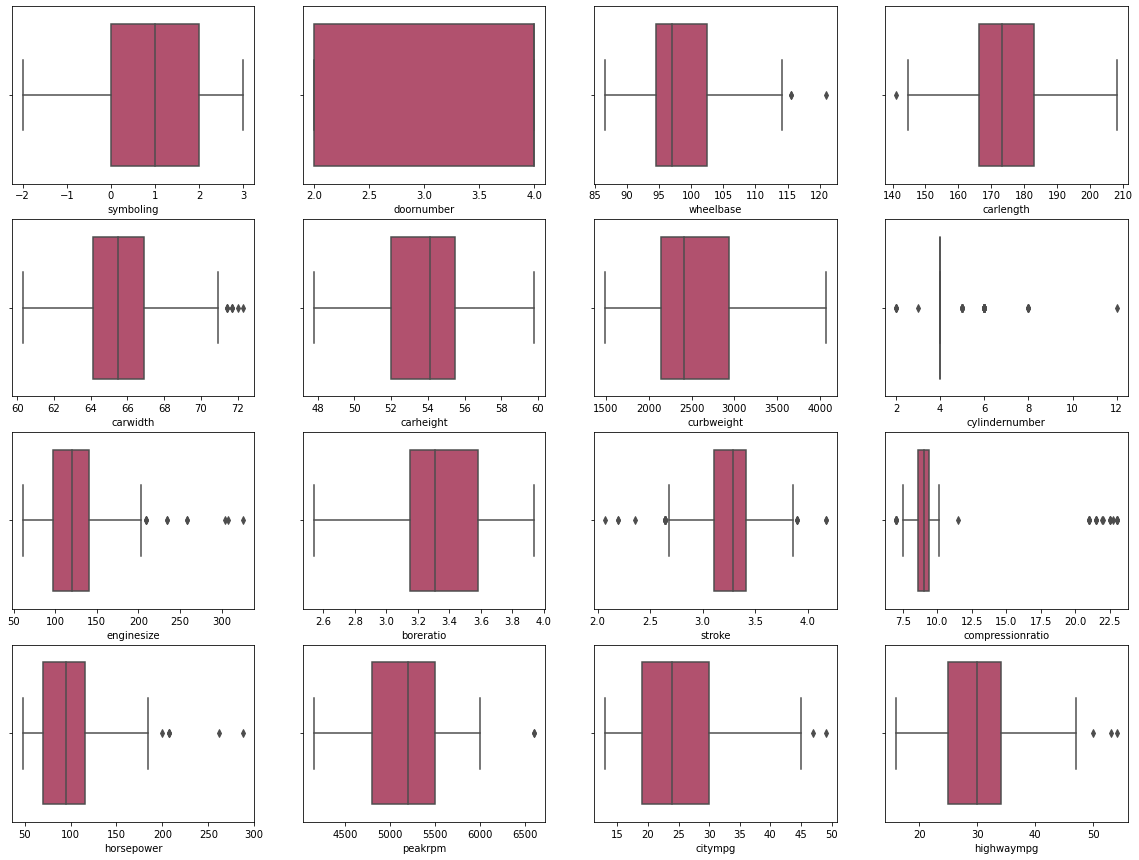

In [20]:
box_plot(['symboling','doornumber', 'wheelbase', 'carlength', 'carwidth'
                  , 'carheight', 'curbweight','cylindernumber', 'enginesize', 'boreratio'
                 ,'stroke','compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'])

# Gráfico de carácteristicas de dispersión

In [21]:
def corr(x, y, **kwargs):
    coef = np.corrcoef(x, y)[0][1]
    label = r'$\rho$ = ' + str(round(coef, 2))
    ax = plt.gca()
    ax.annotate(label, xy = (0.3, 1), size = 30, xycoords = ax.transAxes)

In [22]:
# Creo una función para representar características de dispersión.
def scatter_features(l):
    g = sns.PairGrid(df,y_vars='price',x_vars=df[l].columns, height=5)
    g.map(plt.scatter,color='darkblue',alpha=0.2)
    g.map(corr)
    plt.show()

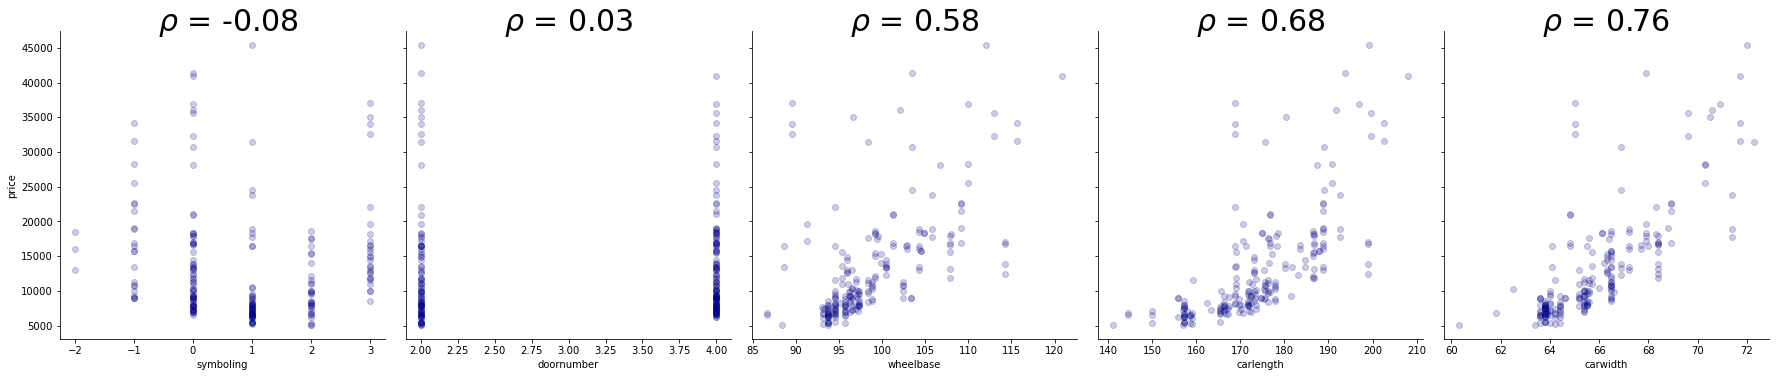

In [23]:
scatter_features(['symboling','doornumber', 'wheelbase', 'carlength', 'carwidth'])

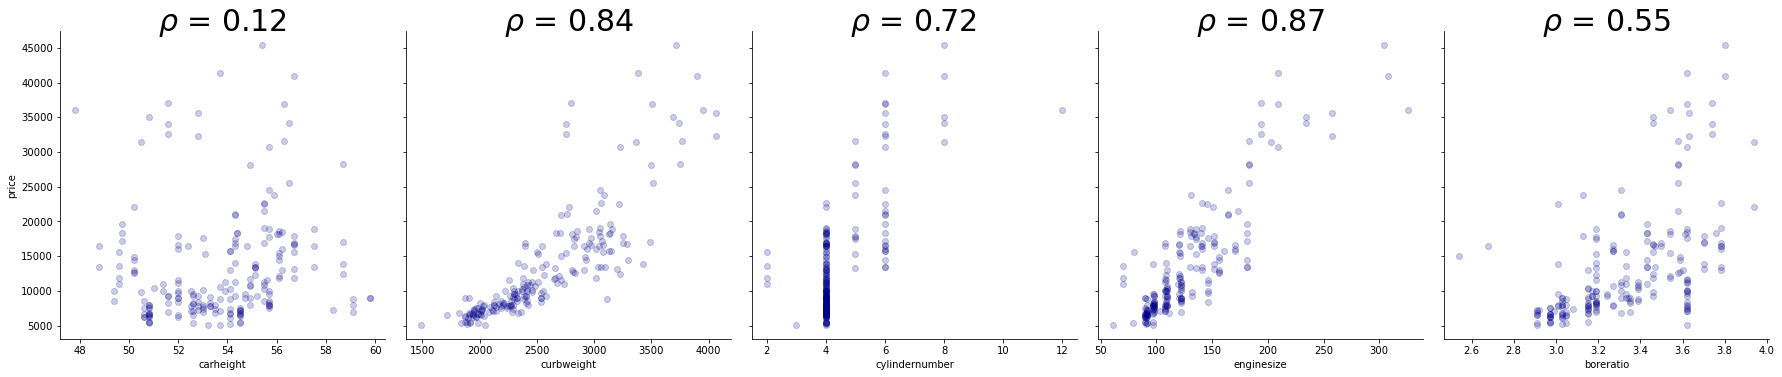

In [24]:
scatter_features(['carheight', 'curbweight','cylindernumber', 'enginesize', 'boreratio'])

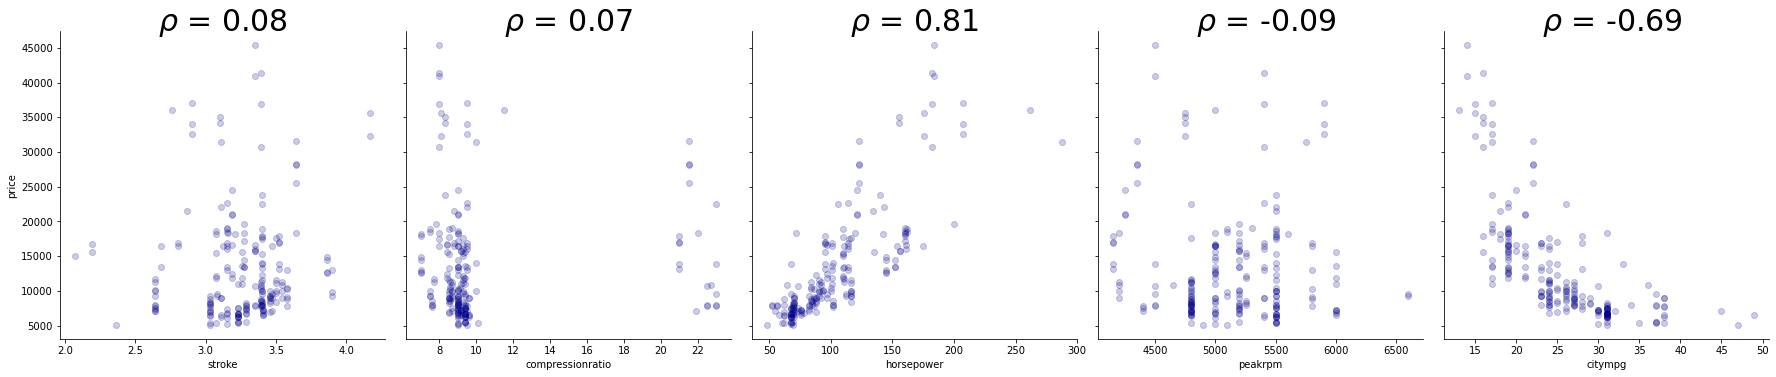

In [25]:
scatter_features(['stroke','compressionratio', 'horsepower', 'peakrpm', 'citympg'])

# Comprobación de la multicolinealidad con Variance Inflation Factor (VIF)
## Elijo cada característica y le hago regresión contra las demás características.

In [26]:
vif_df = df.loc[:, df.columns != 'price']

vif_data = pd.DataFrame()
vif_data["Característica"] = vif_df.columns
vif_data["VIF"] = [variance_inflation_factor(vif_df.values ,i) for i in range(len(vif_df.columns))]
vif_data.head(17)

,Característica,VIF
0,car_ID,732.035468
1,symboling,6.908577
2,doornumber,4.080933
3,wheelbase,20.812317
4,carlength,23.771547
5,carwidth,15.862535
6,carheight,8.218130
7,curbweight,42.002859
8,cylindernumber,28.629785
9,enginesize,67.350593


## A mayor VIF, mayor correlación. Generalmente, un VIF por encima de 5 indica una alta multicolinealidad.

# Manejo de datos numéricos

## Mediante el uso de RobustScaler(), podemos eliminar los valores atípicos y, a continuación, utilizar StandardScaler o MinMaxScaler para preprocesar el conjunto de datos.

In [27]:
# Creo una copia del dataframe tras la limpieza y convertida a numerico.
df_num_clean = df[['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth', 'carheight' 
               ,'curbweight' ,'cylindernumber', 'enginesize','boreratio', 'stroke', 'compressionratio'
               ,'horsepower' ,'peakrpm', 'citympg' ,'highwaympg']].copy()

In [28]:
# Muestro los 5 primeros registros del nuevo dataframe filtrado.
df_num_clean.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22


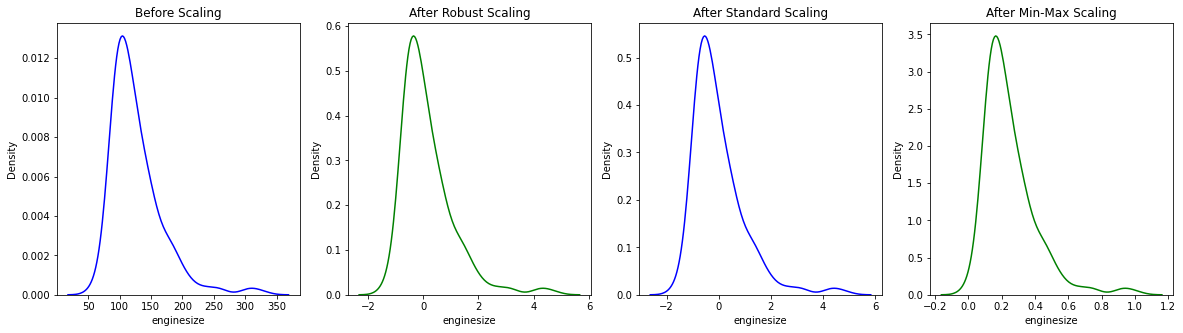

In [29]:
# Creo una variable con las columnas
cols = ['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth', 'carheight' 
               ,'curbweight' ,'cylindernumber', 'enginesize','boreratio', 'stroke', 'compressionratio'
               ,'horsepower' ,'peakrpm', 'citympg' ,'highwaympg']

# Creo el regresor de RobustScaler
scaler = preprocessing.RobustScaler()
# Lo entreno
robust_df = scaler.fit_transform(df_num_clean)
# Lo transformo a dataframe con Pandas
robust_df = pd.DataFrame(robust_df, columns =cols)
# Creo el regresor de StandardScaler
scaler = preprocessing.StandardScaler()
# Lo entreno
standard_df = scaler.fit_transform(df_num_clean)
# Lo transformo a dataframe con Pandas
standard_df = pd.DataFrame(standard_df, columns =cols)

# Uso MinMaxScaler para preprocesar los datos
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(df_num_clean)
minmax_df = pd.DataFrame(minmax_df, columns =cols)
  
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')

sns.kdeplot(df_num_clean['enginesize'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')
  
sns.kdeplot(robust_df['enginesize'], ax = ax2, color ='g')
ax3.set_title('After Standard Scaling')
  
sns.kdeplot(standard_df['enginesize'], ax = ax3, color ='b')
ax4.set_title('After Min-Max Scaling')
  
sns.kdeplot(minmax_df['enginesize'], ax = ax4, color ='g')
plt.show()

In [30]:
def RobustScaling(df_num, cols):
    scaler = preprocessing.RobustScaler()
    robust_df_temp = scaler.fit_transform(df_num)
    robust_df_temp = pd.DataFrame(robust_df_temp, columns =cols)
    return robust_df_temp

In [31]:
robust_scaled = RobustScaling(df_num_clean, ['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth', 'carheight' 
               ,'curbweight' ,'cylindernumber', 'enginesize','boreratio', 'stroke', 'compressionratio'
               ,'horsepower' ,'peakrpm', 'citympg' ,'highwaympg'])

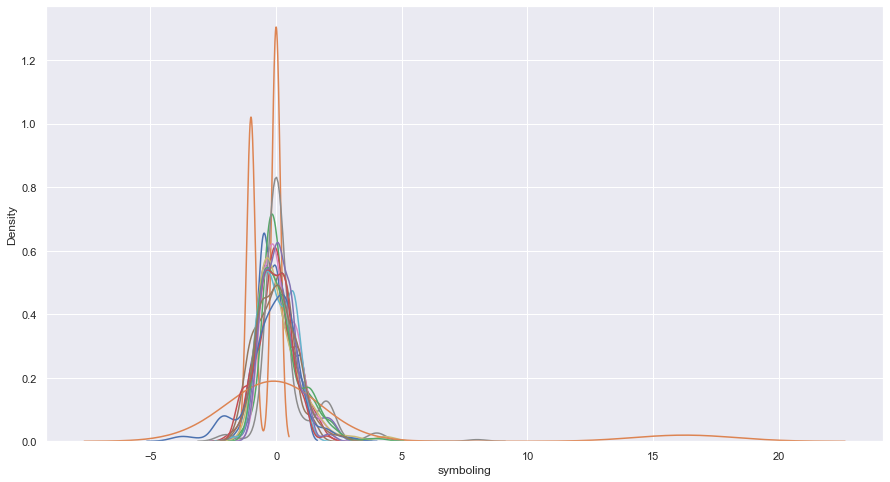

In [32]:
sns.set(rc = {'figure.figsize':(15,8)})
for i in cols:
    sns.kdeplot(robust_scaled[i], legend=True)

In [33]:
robust_scaled.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1.0,-1.0,-1.063291,-0.261905,-0.500000,-1.514286,0.169620,0.0,0.227273,0.372093,-2.033333,0.00,0.347826,-0.285714,-0.272727,-0.333333
1,1.0,-1.0,-1.063291,-0.261905,-0.500000,-1.514286,0.169620,0.0,0.227273,0.372093,-2.033333,0.00,0.347826,-0.285714,-0.272727,-0.333333
2,0.0,-1.0,-0.316456,-0.119048,0.000000,-0.485714,0.517722,2.0,0.727273,-1.465116,0.600000,0.00,1.282609,-0.285714,-0.454545,-0.444444
3,0.5,0.0,0.354430,0.202381,0.250000,0.057143,-0.097468,0.0,-0.250000,-0.279070,0.366667,1.25,0.152174,0.428571,0.000000,0.000000
4,0.5,0.0,0.303797,0.202381,0.321429,0.057143,0.518987,1.0,0.363636,-0.279070,0.366667,-1.25,0.434783,0.428571,-0.545455,-0.888889


In [34]:
# Creo mi dataframe con los datos procesados
clean_df = df.copy()
clean_df.drop(labels=['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth', 'carheight' 
               ,'curbweight' ,'cylindernumber', 'enginesize','boreratio', 'stroke', 'compressionratio'
               ,'horsepower' ,'peakrpm', 'citympg' ,'highwaympg'], axis="columns", inplace=True)
clean_df[['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth', 'carheight' 
               ,'curbweight' ,'cylindernumber', 'enginesize','boreratio', 'stroke', 'compressionratio'
               ,'horsepower' ,'peakrpm', 'citympg' ,'highwaympg']] = robust_scaled[['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth', 'carheight' 
               ,'curbweight' ,'cylindernumber', 'enginesize','boreratio', 'stroke', 'compressionratio'
               ,'horsepower' ,'peakrpm', 'citympg' ,'highwaympg']]
clean_df = clean_df.drop('car_ID', axis=1)

In [35]:
clean_df.head()

,price,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarName_Nissan,CarName_alfa-romero,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_maxda,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porcshce,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_toyouta,CarName_vokswagen,CarName_volkswagen,CarName_volvo,CarName_vw,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,13495.0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,-1.0,-1.063291,-0.261905,-0.500000,-1.514286,0.169620,0.0,0.227273,0.372093,-2.033333,0.00,0.347826,-0.285714,-0.272727,-0.333333
1,16500.0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,-1.0,-1.063291,-0.261905,-0.500000,-1.514286,0.169620,0.0,0.227273,0.372093,-2.033333,0.00,0.347826,-0.285714,-0.272727,-0.333333
2,16500.0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,-1.0,-0.316456,-0.119048,0.000000,-0.485714,0.517722,2.0,0.727273,-1.465116,0.600000,0.00,1.282609,-0.285714,-0.454545,-0.444444
3,13950.0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5,0.0,0.354430,0.202381,0.250000,0.057143,-0.097468,0.0,-0.250000,-0.279070,0.366667,1.25,0.152174,0.428571,0.000000,0.000000
4,17450.0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5,0.0,0.303797,0.202381,0.321429,0.057143,0.518987,1.0,0.363636,-0.279070,0.366667,-1.25,0.434783,0.428571,-0.545455,-0.888889


# Separo la etiqueta a entrenar, en este caso, precio

In [36]:
x_clean = clean_df.drop(['price'] , axis = 1).values
y_clean = clean_df['price'].values

## Utilizo PCA para reducir las dimensiones de los datos seleccionando los más óptimos

In [37]:
pca = PCA(n_components=0.99)
x_reduced = pca.fit_transform(x_clean)

In [38]:
print("Número de características antes de aplicar PCA --> {} y después --> {}".format(x_clean.shape[1], x_reduced.shape[1]))

Número de características antes de aplicar PCA --> 73 y después --> 29


## Para dividir el dataset utilizo train_test_split

In [39]:
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(x_clean, y_clean, test_size=0.2, random_state=42)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(x_reduced, y_clean, test_size=0.2, random_state=42)

## Creo una función para evaluar el los errores de entrenamiento y de R2 Score

In [40]:
clean_evals = dict()
reduced_evals = dict()
def evaluate_regression(evals, model, name, X_train, X_test, y_train, y_test):
    train_error = mean_squared_error(y_train, model.predict(X_train), squared=False)
    test_error = mean_squared_error(y_test, model.predict(X_test), squared=False)
    r2_train = r2_score(y_train, model.predict(X_train))
    r2_test = r2_score(y_test, model.predict(X_test))
    evals[str(name)] = [train_error, test_error, r2_train, r2_test]
    print("El error de entrenamiento de " + str(name) + " es: {} -> El error de prueba de ".format(train_error) + str(name) + " es: {}".format(test_error))
    print("El R2 score del entrenamiento de " + str(name) + " es: {} ".format(r2_train*100) + "y el de prueba es: {}".format(r2_test*100))

In [41]:
def plot_predictions(model, X_test, y_test):
    y_pred = model.predict(X_test)
    df = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
    plt.figure(figsize=(10,6))
    plt.plot(df[:20])
    plt.legend(['Actual' , 'Predijo'])

# Modelos de regresión lineal y de lazo

In [42]:
# Creo el modelo de Regresión Linear y uso la función para evaluarlo
lr = LinearRegression().fit(X_train_clean, y_train_clean)
evaluate_regression(clean_evals,lr, "Linear Regression", X_train_clean, X_test_clean, y_train_clean, y_test_clean)

El error de entrenamiento de Linear Regression es: 1282.9570493062192 -> El error de prueba de Linear Regression es: 2935.8114196935117
El R2 score del entrenamiento de Linear Regression es: 97.24004279412257 y el de prueba es: 89.08215138276067


In [43]:
# Reduzco las dimensiones
reduced_lr = LinearRegression().fit(X_train_r, y_train_r)
evaluate_regression(reduced_evals,reduced_lr, "Reduced Linear Regression", X_train_r, X_test_r, y_train_r, y_test_r)

El error de entrenamiento de Reduced Linear Regression es: 2071.547824139757 -> El error de prueba de Reduced Linear Regression es: 3520.3225924987373
El R2 score del entrenamiento de Reduced Linear Regression es: 92.80438296257677 y el de prueba es: 84.30195090499834


## Muestro una gráfica de las predicciones

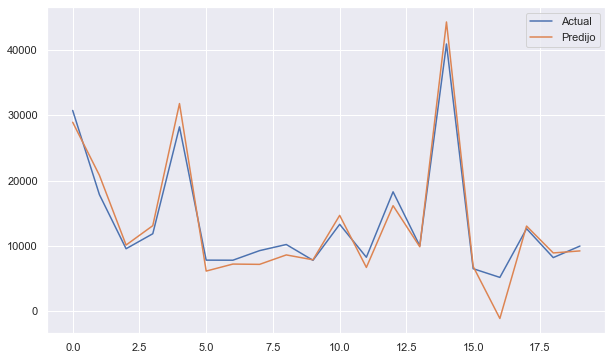

In [44]:
# Muestro la gráfica del modelo de Regresión Linear y lo que predijo
plot_predictions(lr, X_test_clean, y_test_clean)

## Modelo de Regresión Lasso

In [45]:
las = Lasso().fit(X_train_clean, y_train_clean)
evaluate_regression(clean_evals,las, "Lasso Regression", X_train_clean, X_test_clean, y_train_clean, y_test_clean)

El error de entrenamiento de Lasso Regression es: 1286.9568379479704 -> El error de prueba de Lasso Regression es: 3048.2752075560993
El R2 score del entrenamiento de Lasso Regression es: 97.22280690357546 y el de prueba es: 88.22965737308228


In [46]:
# Reduzco las dimensiones
reduced_las = LinearRegression().fit(X_train_r, y_train_r)
evaluate_regression(reduced_evals,reduced_las, "Reduced Lasso Regression", X_train_r, X_test_r, y_train_r, y_test_r)

El error de entrenamiento de Reduced Lasso Regression es: 2071.547824139757 -> El error de prueba de Reduced Lasso Regression es: 3520.3225924987373
El R2 score del entrenamiento de Reduced Lasso Regression es: 92.80438296257677 y el de prueba es: 84.30195090499834


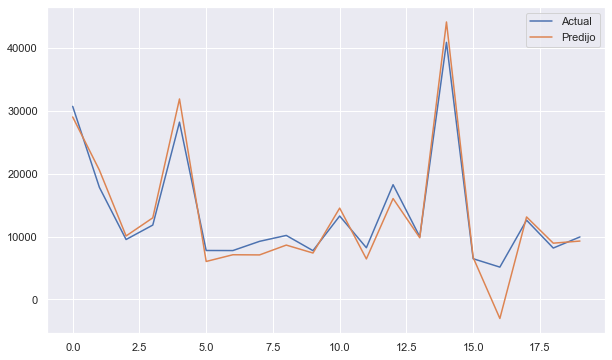

In [47]:
# Muestro la gráfica de las predicciones con Lasso Regression y Reduced Lasso Regression
plot_predictions(las, X_test_clean, y_test_clean)

## Regresión de cresta

In [48]:
rlr = Ridge(alpha=0.9).fit(X_train_clean, y_train_clean)
evaluate_regression(clean_evals,rlr, "Ridge Regression", X_train_clean, X_test_clean, y_train_clean, y_test_clean)

El error de entrenamiento de Ridge Regression es: 1431.9020309845355 -> El error de prueba de Ridge Regression es: 2921.93943556573
El R2 score del entrenamiento de Ridge Regression es: 96.56200909320904 y el de prueba es: 89.18508334136021


In [49]:
reduced_rlr = Ridge(alpha=0.9).fit(X_train_r, y_train_r)
evaluate_regression(reduced_evals,reduced_rlr, "Reduced Ridge Regression", X_train_r, X_test_r, y_train_r, y_test_r)

El error de entrenamiento de Reduced Ridge Regression es: 2085.2818391190044 -> El error de prueba de Reduced Ridge Regression es: 3447.0768834745268
El R2 score del entrenamiento de Reduced Ridge Regression es: 92.70865521092833 y el de prueba es: 84.94839899439896


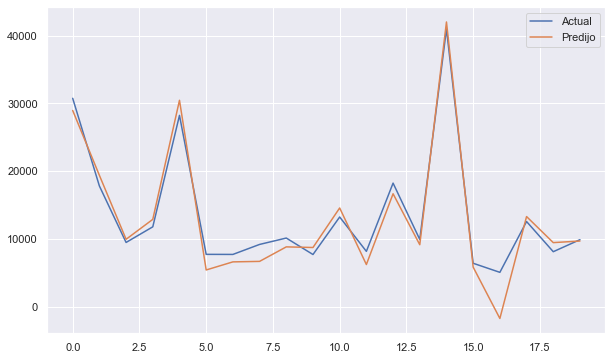

In [50]:
plot_predictions(rlr, X_test_clean, y_test_clean)

## Regresión robusta (Huber Regressor)

In [51]:
huber = HuberRegressor().fit(X_train_clean, y_train_clean)
evaluate_regression(clean_evals,huber, "Robust Regression", X_train_clean, X_test_clean, y_train_clean, y_test_clean)

El error de entrenamiento de Robust Regression es: 1564.0281259930696 -> El error de prueba de Robust Regression es: 2949.161667819833
El R2 score del entrenamiento de Robust Regression es: 95.89826847163405 y el de prueba es: 88.98263041833603


In [52]:
huber_r = HuberRegressor().fit(X_train_r, y_train_r)
evaluate_regression(reduced_evals,huber_r, "Reduced Robust Regression", X_train_r, X_test_r, y_train_r, y_test_r)

El error de entrenamiento de Reduced Robust Regression es: 2241.4649503791597 -> El error de prueba de Reduced Robust Regression es: 3505.9964767766946
El R2 score del entrenamiento de Reduced Robust Regression es: 91.57554105917794 y el de prueba es: 84.42945880105532


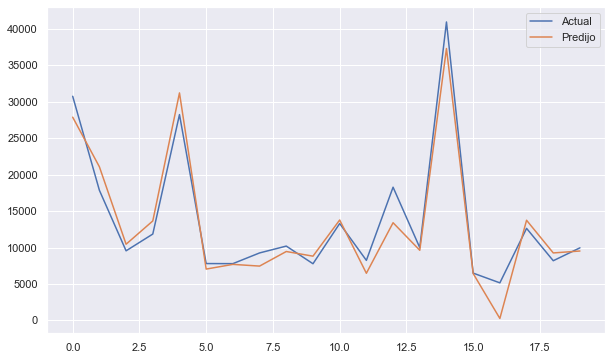

In [53]:
plot_predictions(huber, X_test_clean, y_test_clean)

## RandomForest

In [54]:
rf = RandomForestRegressor(n_estimators=100).fit(X_train_clean, y_train_clean)
evaluate_regression(clean_evals,rf, "RandomForest Regression", X_train_clean, X_test_clean, y_train_clean, y_test_clean)

El error de entrenamiento de RandomForest Regression es: 936.6170385308959 -> El error de prueba de RandomForest Regression es: 1770.090133626681
El R2 score del entrenamiento de RandomForest Regression es: 98.529035398805 y el de prueba es: 96.03108753994327


In [55]:
rf_r = RandomForestRegressor(n_estimators=100).fit(X_train_r, y_train_r)
evaluate_regression(reduced_evals,rf_r, "Reduced RandomForest Regression", X_train_r, X_test_r, y_train_r, y_test_r)

El error de entrenamiento de Reduced RandomForest Regression es: 1039.8436044301775 -> El error de prueba de Reduced RandomForest Regression es: 3002.4007007993673
El R2 score del entrenamiento de Reduced RandomForest Regression es: 98.18693170465622 y el de prueba es: 88.58126319420427


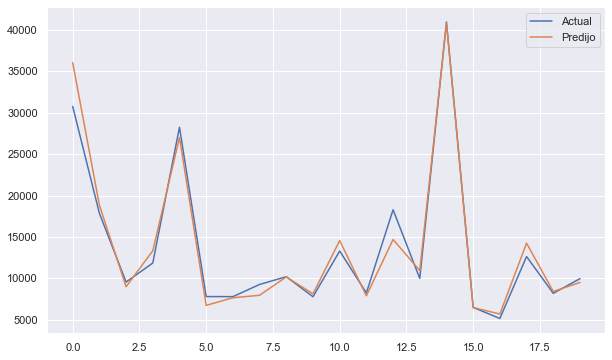

In [56]:
plot_predictions(rf, X_test_clean, y_test_clean)

## Creo una función para visualizar los errores con una gráfica de barras

In [57]:
def visualize_errors(evals, data):
    keys = [key for key in evals.keys()]
    values = [value for value in evals.values()]
    fig, ax = plt.subplots(figsize=(20, 6))
    ax.bar(np.arange(len(keys)) - 0.2, [value[0] for value in values], color='g', width=0.25, align='center')
    ax.bar(np.arange(len(keys)) + 0.2, [value[1] for value in values], color='b', width=0.25, align='center')
    ax.legend(["Training RMSE", "Test RMSE"])
    ax.set_xticklabels(keys)
    ax.set_xticks(np.arange(len(keys)))
    plt.ylim(0, 3000)
    plt.ylabel("RMSE  " + str(data))
    plt.show()

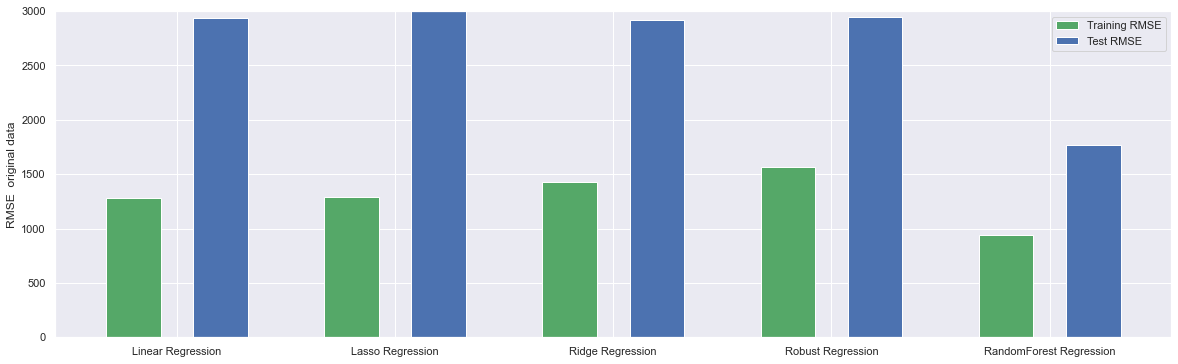

In [58]:
visualize_errors(clean_evals, 'original data')

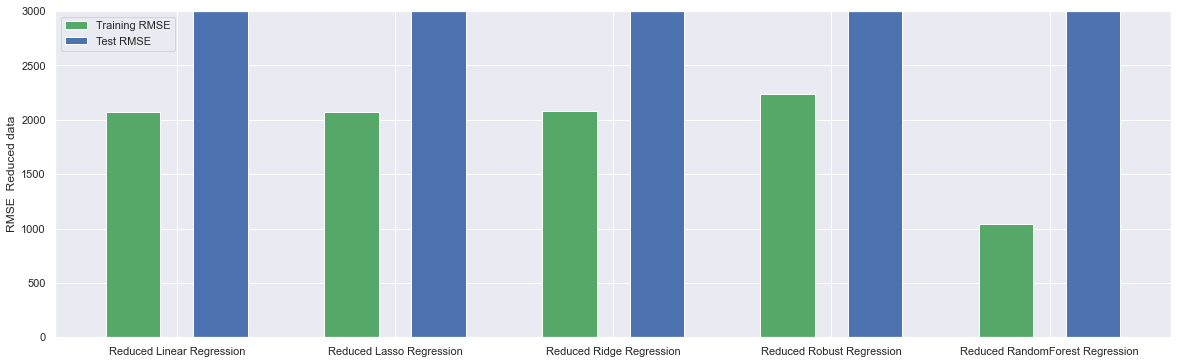

In [59]:
visualize_errors(reduced_evals, 'Reduced data')